In [179]:
library("dplyr")
library("ggplot2")
library("ggrepel")
library("gridExtra")


Attaching package: 'gridExtra'

The following object is masked from 'package:dplyr':

    combine



In [17]:
speed_dating <- read.csv("Speed Dating Data.csv")

In [18]:
#remove irrelevant columns
speed_dating_clean <- select(speed_dating,-c(field,
                                zipcode, go_out, career,
                                exphappy, expnum, match_es,
                                attr1_s:shar1_s, attr1_s:shar1_s,
                                attr3_s:amb3_s,satis_2,
                                length, numdat_2,
                                attr7_2:shar7_2, attr1_2:shar1_2,
                                attr4_2:shar4_2, attr2_2:shar2_2,
                                attr3_2:amb3_2, attr5_2:amb5_2,
                                attr1_3:shar1_3, attr7_3:shar7_3,
                                attr4_3:shar4_3, attr2_3:shar2_3,
                                attr3_3:amb3_3, attr5_3:amb5_3))

In [19]:
#normalize surveys

speed_dating_adj <- speed_dating_clean
df3_1 <- speed_dating[, c("attr3_1", "sinc3_1", "fun3_1", "intel3_1", "amb3_1")]
#df3_1
df3_s <- speed_dating[, c("attr3_s", "sinc3_s", "intel3_s", "fun3_s", "amb3_s")]
#df3_s

#names(speed_dating)[c(115:119)]

df3_1 <- cbind(df3_1, "sums" = apply(df3_1, 1, sum))
df3_1 <- df3_1[,1:5]/df3_1[,6]*100
#rowSums(df3_1)

speed_dating_adj[, c("attr3_1", "sinc3_1", "fun3_1", "intel3_1", "amb3_1")] <- df3_1

df3_s <- cbind(df3_s, "sums" = apply(df3_s, 1, sum))
df3_s <- df3_s[,1:5]/df3_s[,6]*100
#rowSums(df3_s)
speed_dating_adj[, c("attr3_s", "sinc3_s", "intel3_s", "fun3_s", "amb3_s")] <- df3_s

In [190]:
#adjusted df
#speed_dating_adj[, c("attr3_1", "sinc3_1", "fun3_1", "intel3_1", "amb3_1", "attr3_s", "sinc3_s", "intel3_s", "fun3_s", "amb3_s")]

#apply(speed_dating_adj[,c("attr3_1", "sinc3_1", "fun3_1", "intel3_1", "amb3_1", "attr3_s", "sinc3_s", "intel3_s", "fun3_s", "amb3_s")], 2, mean, na.rm = TRUE)

#summary(speed_dating_adj[,c("attr3_1", "sinc3_1", "fun3_1", "intel3_1", "amb3_1", "attr3_s", "sinc3_s", "intel3_s", "fun3_s", "amb3_s")])

In [148]:
#table(speed_dating_adj$career_c)
#table(speed_dating_adj$match) #1=yes, 2=no
careers <- data.frame("career_c" = 1:17, career =
                 c("1" ="Lawyer", "2"= "Academic/Research", "3"= "Psychologist", "4"= "Doctor/Medicine",
                   "5"="Engineer", "6"= "Creative Arts/Entertainment",
                   "7"= "Banking/Consulting/Finance/Marketing/Business/CEO/Entrepreneur/Admin",
                   "8"= "Real Estate", "9"= "International/Humanitarian Affairs", "10"= "Undecided", "11"="Social Work",
                   "12"="Speech Pathology", "13"= "Politics", "14"="Pro sports/Athletics",
                   "15"="Other", "16"="Journalism", "17"="Architecture"))
#careers
fields <- data.frame("field_cd" = 1:18, field = 
                c("1" ="Law", "2"= "Math", "3"= "Social Science, Psychologist",
                  "4"= "Medical Science, Pharmaceuticals, and Bio Tech",
                  "5"="Engineering", "6"= "English/Creative Writing/ Journalism", "7"= "History/Religion/Philosophy",
                  "8"= "Business/Econ/Finance", "9"= "Education, Academia", "10"= "Biological Sciences/Chemistry/Physics",
                  "11"="Social Work", "12"="Undergrad/undecided", "13"= "Political Science/International Affairs", "14"="Film",
                  "15"="Fine Arts/Arts Administration", "16"="Languages", "17"="Architecture", "18"="Other"))
#fields

In [146]:
#names(speed_dating_adj) == "career_c"
#cbind(speed_dating_adj[,c("match","career_c","field_cd")])
career_df <- left_join(x = speed_dating_adj[,c("match","career_c")], y = careers, by = "career_c")
career_df$match <- ifelse(career_df$match==0, "no", "yes")
#career_df

field_df <- left_join(x = speed_dating_adj[,c("match","field_cd")], y = fields, by = "field_cd")
field_df$match <- ifelse(field_df$match==0, "no", "yes")
#field_df

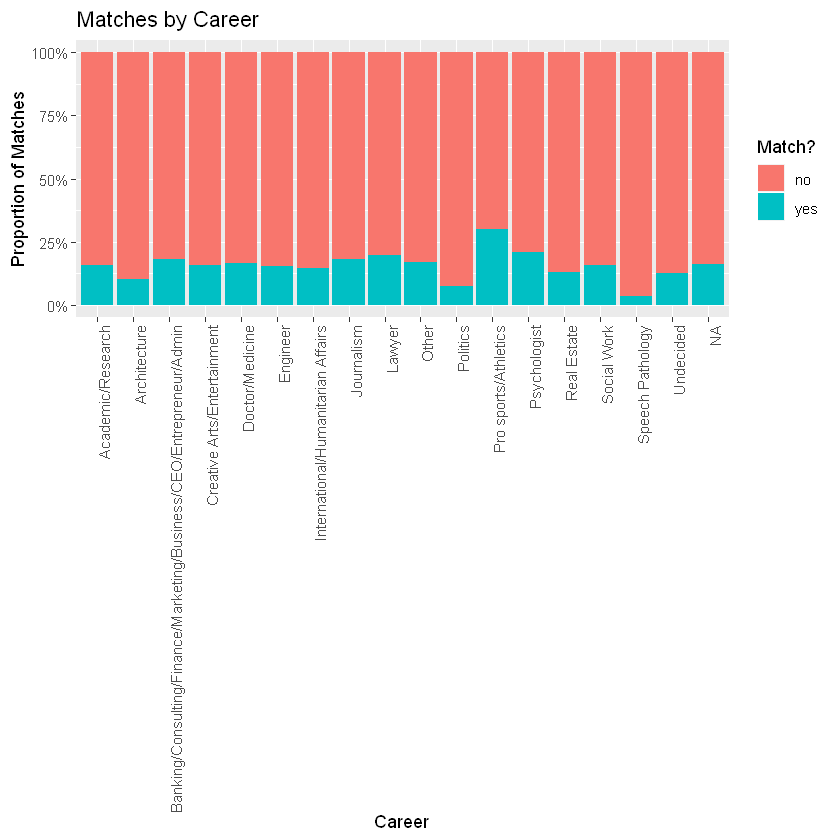

In [185]:
#table(career_df$match, career_df$career)
ggplot(career_df, aes(fill=match, x=career)) + 
    geom_bar(position = "fill") + scale_y_continuous(labels = scales::percent) +
    theme(axis.text.x = element_text(angle = 90, hjust = 1)) + ggtitle("Matches by Career") +
    xlab("Career") + ylab("Proportion of Matches") + scale_fill_discrete("Match?")

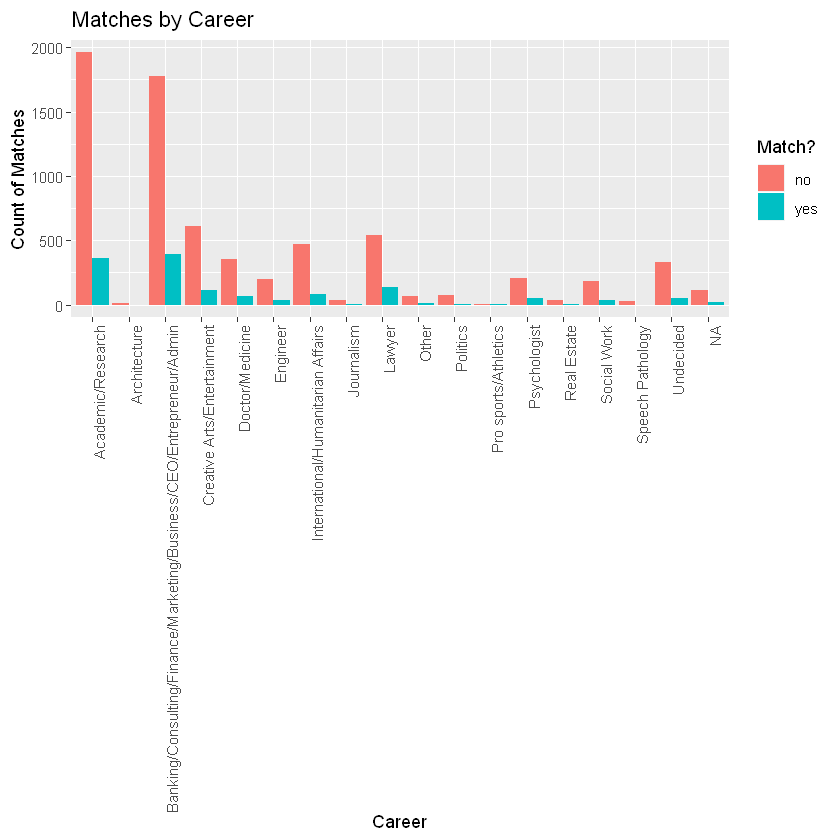

In [186]:
ggplot(career_df, aes(fill=match, x=career)) + 
    geom_bar(position = "dodge") + 
    theme(axis.text.x = element_text(angle = 90, hjust = 1)) + ggtitle("Matches by Career") +
    xlab("Career") + ylab("Count of Matches") + scale_fill_discrete("Match?")

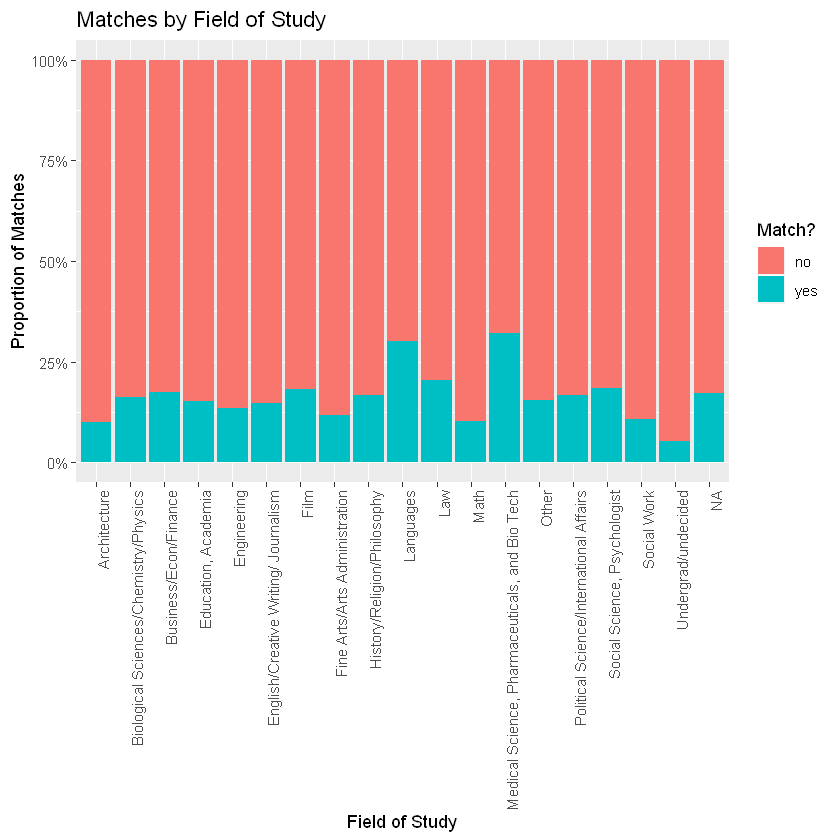

In [187]:
ggplot(field_df, aes(fill=match, x=field)) + 
    geom_bar(position = "fill") + scale_y_continuous(labels = scales::percent) +
    theme(axis.text.x = element_text(angle = 90, hjust = 1)) + ggtitle("Matches by Field of Study") +
    xlab("Field of Study") + ylab("Proportion of Matches") + scale_fill_discrete("Match?")

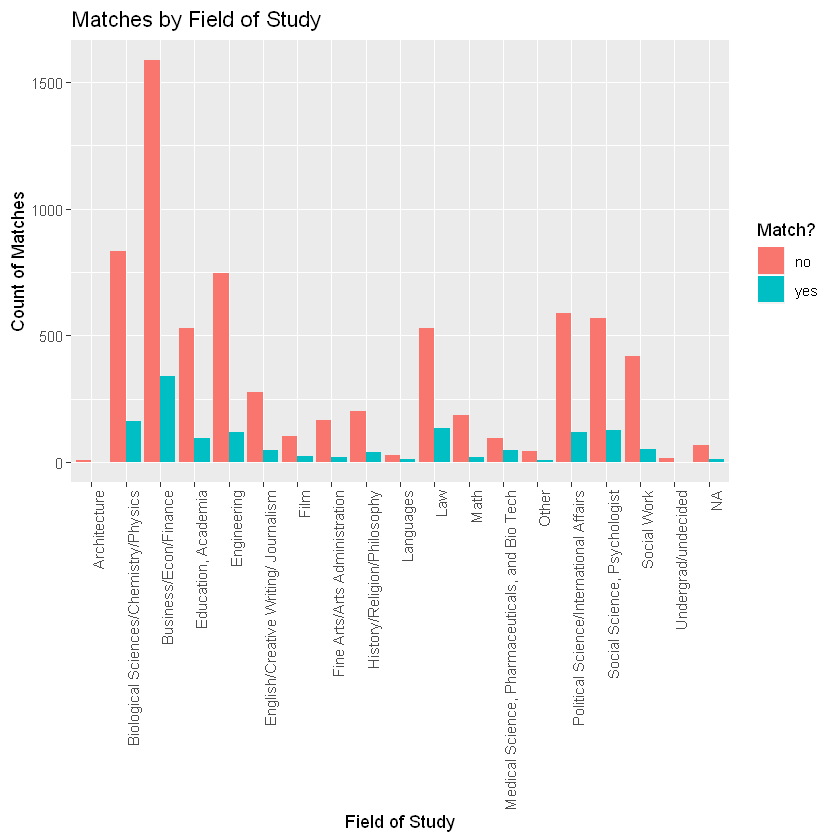

In [189]:
ggplot(field_df, aes(fill=match, x=field)) + 
    geom_bar(position = "dodge") +
    theme(axis.text.x = element_text(angle = 90, hjust = 1)) + ggtitle("Matches by Field of Study") +
    xlab("Field of Study") + ylab("Count of Matches") + scale_fill_discrete("Match?")